In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [144]:
# Class
class Pandemic():
    susceptible = 0
    infected = 0
    recovered = 0
    def __init__(self, susceptible, infected, recovered, b, k):
        # Susceptible, infected and recovered are initial values.
        #b:  Number of contacts
        # k: recovery time(days)
        self.s = susceptible/susceptible
        self.i = infected/susceptible
        self.r = recovered/susceptible
        self.b = b
        self.k = k
        
        # The model function solves the differential equation of epidemology.
        # input parametrs: day=number of days. step: the step size used in euler method.
    def model(self, days, step ):
        iteration = int(days/step)
        x = [0]
        
        # Initial Values
        s = [self.s]
        i = [self.i]
        r = [self.r]
        
        # Euelr solution to the patial differential equation
        for j in np.arange(1,iteration):
            s_new = s[j-1] - self.b*s[j-1]*i[j-1]*step
            i_new = i[j-1] + (self.b*s[j-1]*i[j-1]-self.k*i[j-1])*step
            r_new = r[j-1] + self.k* i[j-1]*step
            s.append(s_new)
            i.append(i_new)
            r.append(r_new)
            x.append(x[j-1]+ step)
        prediction = pd.DataFrame({'susceptible':s, 'infected':i, 'recovered':r, 'x':x})
        return prediction
    
        

In [145]:

cor = Pandemic(susceptible=1e8-12, infected=12, recovered = 0, b = 0.7, k = 1/5)

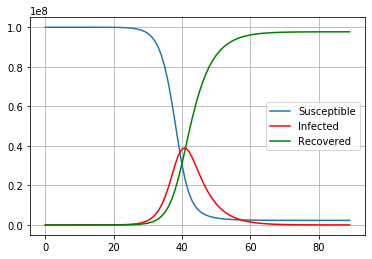

In [147]:
soln = cor.model(days=90,step=1)

#plot

plt.plot(soln.x, 1e8*soln.susceptible, label = "Susceptible")
plt.plot(soln.x, 1e8*soln.infected, 'red', label = "Infected")
plt.plot(soln.x, 1e8*soln.recovered, 'green', label = "Recovered")
plt.legend()
plt.grid()